In [4]:
import sys
sys.path.append('../src') # Add src to path

from user_interaction import welcome_message, model_decider, collect_values
from preprocessing import load_data 
from models import full_pipeline
from features import feature_engineering, scaling, add_constant_column

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Import source code
from preprocessing import load_data

# Read in the dataset
df = load_data()

# **Data preparation**  

## **Determine:**  
#### - _**Sensitive vs. non-sensitive data**_
#### - _**Strongly correlated features (Multicollinearity)**_

|**Non-sensitive**|**Sensitive**|
|:---|:---|
|Country|Alcohol consumption|
|Region|Immunisation rates against Hep B, Measles, Polio, Diphtheria|
|Year|BMI|
|**Infant mortality**|Incidence of HIV|
|**Under five mortality**|**Child thinness (5-9 years)**|
|Adult mortality|**Child thinness (10-19 years)**|
|GDP per capita||
|Population||
|Schooling||
|**Economically developed**||
|**Economically developing**||

Pairs of features in **bold** are expected to be linearly dependent, and to cause multicollinearity

## **Train-test split**

<img src="https://images.unsplash.com/photo-1748280933446-c9be297ec3be?ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&q=80&w=1170" width = 400px, height=300px/>

## **Feature engineering**   

#### _Optimising the dataset for linear regression modelling_

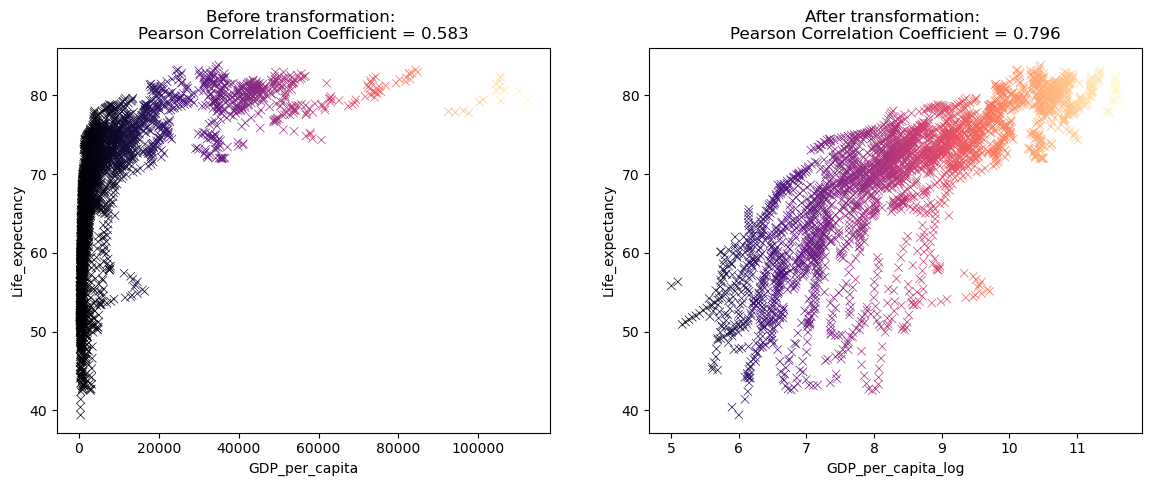

In [ ]:
# Make a copy of the original dataframe, for demonstration purposes only
df_demo = df.copy()

# Using GDP as an example: calculate the log of this column
df_demo['GDP_per_capita_log'] = np.log1p(df_demo['GDP_per_capita'])

# Store the column names of variables to be plotted
x_data_1 = 'GDP_per_capita'
x_data_2 = 'GDP_per_capita_log'
y_data = 'Life_expectancy'

# Calculate Pearson Correlation Coefficient for the two predictor variables against the target (life expectancy)
P_value_1 = df_demo[[x_data_1,y_data]].corr().iloc[1,0]
P_value_2 = df_demo[[x_data_2,y_data]].corr().iloc[1,0]

# Initialise a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Subplot 1: Original GDP data vs life expectancy
sns.scatterplot(data=df_demo,
                x=x_data_1,
                y=y_data,
                marker='x',
                palette='magma',
                hue='GDP_per_capita',
                legend=None,
                ax=axes[0])
axes[0].set_title(f'Before transformation: \nPearson Correlation Coefficient = {round(P_value_1,3)}')

# Subplot 2: Log GDP data vs life expectancy
sns.scatterplot(data=df_demo,
                x=x_data_2,
                y=y_data,
                marker='x',
                palette='magma',
                hue='GDP_per_capita_log',
                legend=None,
                ax=axes[1])
axes[1].set_title(f'After transformation: \nPearson Correlation Coefficient = {round(P_value_2,3)}')

plt.savefig('../visualisations/pearsons')

plt.show()

##### Engineered dataset has a **more linear trend**, and the effect of **outliers** has been reduced.  

##### Features such as total population produced a **weak correlation** with life expectancy and have been **removed from the model**.

## **Normalisation**  

#### Using _Robust Scaler_

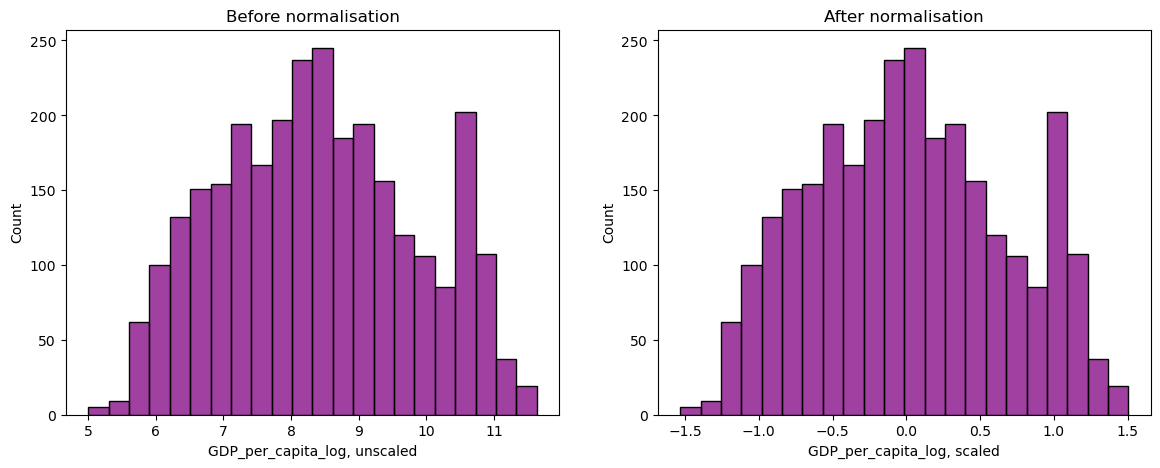

In [ ]:
# Create a list of features to be feature engineered and scaled
feature_cols_demo = ['Region', 'Infant_deaths', 'Under_five_deaths',
               'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B',
               'Measles', 'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV',
               'GDP_per_capita', 'Population_mln', 
               'Thinness_ten_nineteen_years', 'Thinness_five_nine_years',
               'Schooling', 'Economy_status_Developed',
               'Life_expectancy'
              ]

# Apply feature engineering and scaling functions to selected columns
df_demo_fe = feature_engineering(df_demo[feature_cols_demo])
feature_cols_demo = df_demo_fe.columns
df_demo_scaled, scaler = scaling(df_demo_fe)

# Extract unscaled and scaled datasets for comparison
hist_data_1 = df_demo_fe['GDP_per_capita_log']
hist_data_2 = df_demo_scaled['GDP_per_capita_log']

# Initialise a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Subplot 1: histogram of unscaled GDP data
sns.histplot(data=hist_data_1,
                color='purple',
                ax=axes[0])
axes[0].set_title('Before normalisation')
axes[0].set_xlabel('GDP_per_capita_log, unscaled') 

# Subplot 2: histogram of scaled GDP data
sns.histplot(data=hist_data_2,
                color='purple',         
                ax=axes[1])
axes[1].set_title('After normalisation')
axes[1].set_xlabel('GDP_per_capita_log, scaled') 

plt.savefig('../visualisations/normalisation')
plt.show()

##### The **distribution** is unchanged, but the scale (x-axis) has been normalised for consistency with other features.